# Tugas Kelompok

Disusun oleh kelompok 4:
1. Muhammad Nabil Azizi (120450090)

2. Rika Ajeng Finatih (121450036)

3. A Rafi Paringgom Iwari (121450039)

4. Anissa Luthfi Alifia (121450093)

5. Elsyah Sapyrah (121450096)

# PREDIKSI HARGA SAHAM TSLA

## Import dataset dan library

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [63]:
# Import dataset

Data_Saham = pd.read_csv("WIKI-TSLA.csv")
print(Data_Saham)

            Date    Open      High     Low   Close      Volume  Ex-Dividend  \
0     2018-03-27  304.00  304.2700  277.18  279.18  13696168.0          0.0   
1     2018-03-26  307.34  307.5900  291.36  304.18   8324639.0          0.0   
2     2018-03-23  311.25  311.6100  300.45  301.54   6600538.0          0.0   
3     2018-03-22  313.89  318.8200  308.18  309.10   4914307.0          0.0   
4     2018-03-21  310.25  322.4400  310.19  316.53   5927881.0          0.0   
...          ...     ...       ...     ...     ...         ...          ...   
1944  2010-07-06   20.00   20.0000   15.83   16.11   6866900.0          0.0   
1945  2010-07-02   23.00   23.1000   18.71   19.20   5139800.0          0.0   
1946  2010-07-01   25.00   25.9200   20.27   21.96   8218800.0          0.0   
1947  2010-06-30   25.79   30.4192   23.30   23.83  17187100.0          0.0   
1948  2010-06-29   19.00   25.0000   17.54   23.89  18766300.0          0.0   

      Split Ratio  Adj. Open  Adj. High  Adj. Low  

In [64]:
Data_Saham = Data_Saham.sort_values('Date', ascending=True)

## Cleaning Data

In [71]:
# Mengecek data yang missing
Data_Saham.isnull().sum()


Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
Return         1
dtype: int64

In [72]:
Data_Saham.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
Return         1
dtype: int64

Ternyata tidak ada data yang hilang, sehingga kita bisa masuk kedalam proses selanjutnya.

## Menghitung Return Harian

Return harian merupakan suatu pengembalian yang investor terima dari hasil penjualan nilai kepemilikan saham TESLA.

In [73]:
Data_Saham['Return'] = Data_Saham['Close'].pct_change() * 100
print(Data_Saham['Return'])

1948          NaN
1947    -0.251151
1946    -7.847251
1945   -12.568306
1944   -16.093750
          ...    
4        1.925616
3       -2.347329
2       -2.445810
1        0.875506
0       -8.218818
Name: Return, Length: 1949, dtype: float64


## Menghitung Statistika Distribusi Gaussian

In [74]:
# Menghitung mean atau rata-rata dari return harian
mean_return = Data_Saham['Return'].mean()
print(mean_return)

0.1765722293273946


In [75]:
# Menghitung standar deviasi dari return harian
std_dev_return = Data_Saham['Return'].std()
print(std_dev_return)

3.1849008101748177


In [76]:
# Membuat Distribusi Gaussian
x = np.linspace(mean_return - 3*std_dev_return, mean_return + 3*std_dev_return, 100)
print(x)


[-9.3781302  -9.18510591 -8.99208162 -8.79905733 -8.60603304 -8.41300874
 -8.21998445 -8.02696016 -7.83393587 -7.64091158 -7.44788729 -7.25486299
 -7.0618387  -6.86881441 -6.67579012 -6.48276583 -6.28974154 -6.09671725
 -5.90369295 -5.71066866 -5.51764437 -5.32462008 -5.13159579 -4.9385715
 -4.7455472  -4.55252291 -4.35949862 -4.16647433 -3.97345004 -3.78042575
 -3.58740146 -3.39437716 -3.20135287 -3.00832858 -2.81530429 -2.62228
 -2.42925571 -2.23623141 -2.04320712 -1.85018283 -1.65715854 -1.46413425
 -1.27110996 -1.07808567 -0.88506137 -0.69203708 -0.49901279 -0.3059885
 -0.11296421  0.08006008  0.27308438  0.46610867  0.65913296  0.85215725
  1.04518154  1.23820583  1.43123012  1.62425442  1.81727871  2.010303
  2.20332729  2.39635158  2.58937587  2.78240016  2.97542446  3.16844875
  3.36147304  3.55449733  3.74752162  3.94054591  4.13357021  4.3265945
  4.51961879  4.71264308  4.90566737  5.09869166  5.29171595  5.48474025
  5.67776454  5.87078883  6.06381312  6.25683741  6.4498617

In [77]:
pdf = norm.pdf(x, mean_return, std_dev_return)
print(pdf)

[0.00139152 0.00166592 0.00198712 0.00236156 0.00279626 0.00329885
 0.00387749 0.00454093 0.00529838 0.00615952 0.00713436 0.00823319
 0.00946642 0.01084447 0.01237758 0.01407563 0.01594795 0.01800307
 0.02024852 0.02269053 0.02533382 0.02818134 0.03123398 0.03449037
 0.03794663 0.04159617 0.04542953 0.04943425 0.05359478 0.05789243
 0.06230542 0.06680897 0.07137538 0.07597434 0.08057312 0.08513698
 0.08962953 0.09401319 0.0982497  0.10230067 0.10612814 0.10969514
 0.11296633 0.11590855 0.11849136 0.12068762 0.12247389 0.12383093
 0.12474397 0.12520301 0.12520301 0.12474397 0.12383093 0.12247389
 0.12068762 0.11849136 0.11590855 0.11296633 0.10969514 0.10612814
 0.10230067 0.0982497  0.09401319 0.08962953 0.08513698 0.08057312
 0.07597434 0.07137538 0.06680897 0.06230542 0.05789243 0.05359478
 0.04943425 0.04542953 0.04159617 0.03794663 0.03449037 0.03123398
 0.02818134 0.02533382 0.02269053 0.02024852 0.01800307 0.01594795
 0.01407563 0.01237758 0.01084447 0.00946642 0.00823319 0.0071

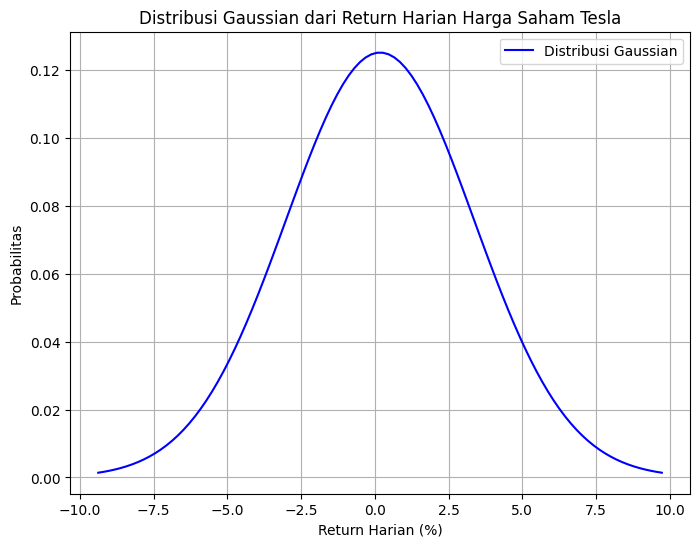

In [78]:
# Visualisasi Distribusi Gaussian

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Distribusi Gaussian', color='blue')
plt.title('Distribusi Gaussian dari Return Harian Harga Saham Tesla')
plt.xlabel('Return Harian (%)')
plt.ylabel('Probabilitas')
plt.legend()
plt.grid(True)

## Prediksi Harga Saham di Masa Depan dengan Metode Gaussian

In [79]:
# Prediksi harga saham besok

last_close = Data_Saham['Close'].iloc[-1]
predicted_return = np.random.normal(mean_return, std_dev_return)
predicted_price = last_close * (1 + predicted_return / 100)

print(f'Harga saham besok diperkirakan: ${predicted_price:.2f}')

plt.show()

Harga saham besok diperkirakan: $277.59


## Evaluasi Model

Evaluasi model dengan menggunakan MSE untuk melihat ke erroran dari prediksi yang sudah di buat.

In [80]:
historical_data = Data_Saham['Close'].values
print(historical_data)

[ 23.89  23.83  21.96 ... 301.54 304.18 279.18]


In [81]:
predicted_data = np.random.normal(mean_return, std_dev_return, len(historical_data))
print(predicted_data)

[ 0.03806086 -0.15465754 -0.20227684 ... -1.96286335 -5.68765262
  3.04332677]


In [82]:
# Menghitung nilai MSE dari prediksi
mse = ((historical_data - predicted_data) ** 2).mean()
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 37461.67


## Visualisasi Hasil

In [83]:
Data_Saham['Date'] = pd.DatetimeIndex(Data_Saham['Date'])

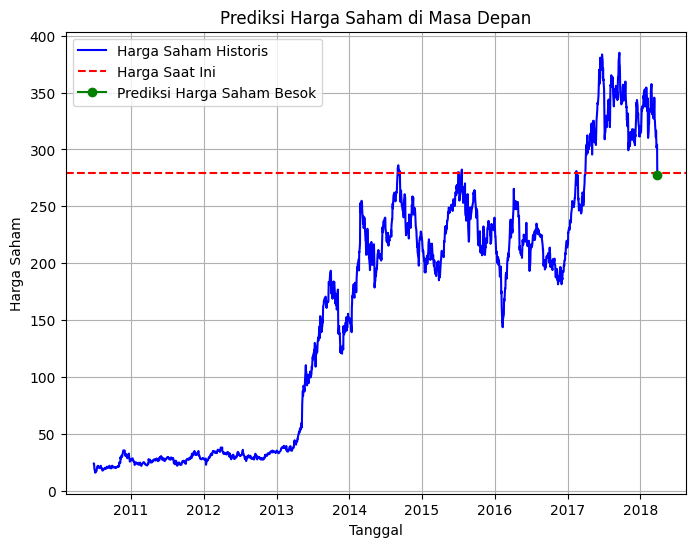

In [85]:
# Menampilkan grafik harga saham historis dan prediksi

plt.figure(figsize=(8, 6))
plt.plot(Data_Saham['Date'], Data_Saham['Close'], label='Harga Saham Historis', color='blue')
plt.axhline(y=last_close, color='red', linestyle='--', label='Harga Saat Ini')
plt.plot(Data_Saham['Date'].iloc[-1] + pd.DateOffset(days=1), predicted_price, marker='o', color='green', label='Prediksi Harga Saham Besok')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham di Masa Depan')
plt.legend()
plt.grid(True)
plt.show()